In [1]:
import pandas as pd

In [2]:
sun_df=pd.read_csv('pv_open_2020.csv')
sun_df

,sc_gid,capacity_factor,global_horizontal_irradiance,capacity_mw,area_sq_km,latitude,longitude,distance_to_transmission_km
0,0,0.139177,3.354821,591.452887,18.482903,48.994,-122.735,0.673354
1,1,0.137451,3.306946,596.647266,18.645227,49.022,-122.575,6.875389
2,2,0.136000,3.293000,2.851200,0.089100,49.049,-122.414,7.901461
3,3,0.141827,3.417382,2014.383178,62.949474,48.900,-122.688,2.910129
4,4,0.137829,3.327924,3557.400778,111.168774,48.927,-122.529,102.926423
...,...,...,...,...,...,...,...,...
55514,55530,0.206913,5.196184,965.520000,30.172500,25.982,-97.349,22.586464
55515,55531,0.205765,5.174338,238.679140,7.458723,25.983,-97.231,9.374740
55516,55532,0.208000,5.208001,25.093151,0.784161,25.877,-97.583,4.844146
55517,55533,0.207652,5.203368,330.091200,10.315350,25.879,-97.465,5.204726


In [3]:
sun_df[['latitude','longitude']]=sun_df[['latitude','longitude']].round(0)

In [4]:
sun_map_df=sun_df[['latitude','longitude','capacity_mw','area_sq_km']]
sun_map_df

,latitude,longitude,capacity_mw,area_sq_km
0,49.0,-123.0,591.452887,18.482903
1,49.0,-123.0,596.647266,18.645227
2,49.0,-122.0,2.851200,0.089100
3,49.0,-123.0,2014.383178,62.949474
4,49.0,-123.0,3557.400778,111.168774
...,...,...,...,...
55514,26.0,-97.0,965.520000,30.172500
55515,26.0,-97.0,238.679140,7.458723
55516,26.0,-98.0,25.093151,0.784161
55517,26.0,-97.0,330.091200,10.315350


In [5]:
sun_map_df['latitude']=sun_map_df['latitude'].astype('str')
sun_map_df['longitude']=sun_map_df['longitude'].astype('str')
sun_map_df.dtypes

<ipython-input-5-fbd6e5ae2ed0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_map_df['latitude']=sun_map_df['latitude'].astype('str')
<ipython-input-5-fbd6e5ae2ed0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_map_df['longitude']=sun_map_df['longitude'].astype('str')


latitude        object
longitude       object
capacity_mw    float64
area_sq_km     float64
dtype: object

In [6]:
sun_map_df['coordinates']=sun_map_df['latitude'].str.cat(sun_map_df['longitude'],sep=',')
sun_map_df

<ipython-input-6-3f8818708021>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_map_df['coordinates']=sun_map_df['latitude'].str.cat(sun_map_df['longitude'],sep=',')


,latitude,longitude,capacity_mw,area_sq_km,coordinates
0,49.0,-123.0,591.452887,18.482903,"49.0,-123.0"
1,49.0,-123.0,596.647266,18.645227,"49.0,-123.0"
2,49.0,-122.0,2.851200,0.089100,"49.0,-122.0"
3,49.0,-123.0,2014.383178,62.949474,"49.0,-123.0"
4,49.0,-123.0,3557.400778,111.168774,"49.0,-123.0"
...,...,...,...,...,...
55514,26.0,-97.0,965.520000,30.172500,"26.0,-97.0"
55515,26.0,-97.0,238.679140,7.458723,"26.0,-97.0"
55516,26.0,-98.0,25.093151,0.784161,"26.0,-98.0"
55517,26.0,-97.0,330.091200,10.315350,"26.0,-97.0"


In [7]:
sun_map_df=sun_map_df.drop(['latitude','longitude'],axis=1)
sun_map_df=sun_map_df.groupby(['coordinates']).agg({'capacity_mw':'sum','area_sq_km':'sum'})
sun_map_df

,capacity_mw,area_sq_km
coordinates,,
"25.0,-80.0",529.952562,16.561018
"25.0,-81.0",1662.288455,51.946514
"26.0,-80.0",8576.977144,268.030536
"26.0,-81.0",37435.949706,1169.873428
"26.0,-82.0",13137.264029,410.539501
...,...,...
"49.0,-95.0",14796.471049,462.389720
"49.0,-96.0",64316.335143,2009.885473
"49.0,-97.0",107416.911317,3356.778479


In [8]:
sun_map_df=sun_map_df.reset_index(level=['coordinates'])
sun_map_df

,coordinates,capacity_mw,area_sq_km
0,"25.0,-80.0",529.952562,16.561018
1,"25.0,-81.0",1662.288455,51.946514
2,"26.0,-80.0",8576.977144,268.030536
3,"26.0,-81.0",37435.949706,1169.873428
4,"26.0,-82.0",13137.264029,410.539501
...,...,...,...
922,"49.0,-95.0",14796.471049,462.389720
923,"49.0,-96.0",64316.335143,2009.885473
924,"49.0,-97.0",107416.911317,3356.778479
925,"49.0,-98.0",120982.353413,3780.698544


In [9]:
latlng=sun_map_df['coordinates'].str.split(',',expand=True) 

In [10]:
latlng.columns=['latitude','longitude']
latlng

,latitude,longitude
0,25.0,-80.0
1,25.0,-81.0
2,26.0,-80.0
3,26.0,-81.0
4,26.0,-82.0
...,...,...
922,49.0,-95.0
923,49.0,-96.0
924,49.0,-97.0
925,49.0,-98.0


In [11]:
sun_map_df=sun_map_df.join(latlng).drop(['coordinates'],axis=1)

In [12]:
sun_map_df=sun_map_df.astype({'latitude':float,'longitude':float})

In [13]:
sun_map_df.dtypes

capacity_mw    float64
area_sq_km     float64
latitude       float64
longitude      float64
dtype: object

<AxesSubplot:ylabel='Density'>

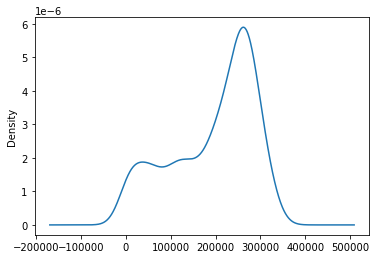

In [16]:
sun_map_df["capacity_mw"].plot.density()

<AxesSubplot:ylabel='Density'>

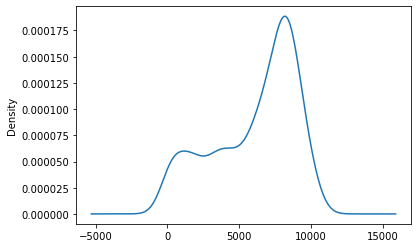

In [17]:
sun_map_df["area_sq_km"].plot.density()

In [ ]:
sun_map_df.to_csv('sun_map_aggregated.csv')